# 3   Processing Raw Text

The most important source of texts is undoubtedly the Web. It's convenient to have existing text collections to explore, such as the corpora we saw in the previous chapters. However, you probably have your own text sources in mind, and need to learn how to access them.

The goal of this chapter is to answer the following questions:

* How can we write programs to access text from local files and from the web, in order to get hold of an unlimited range of language material?
* How can we split documents up into individual words and punctuation symbols, so we can carry out the same kinds of analysis we did with text corpora in earlier chapters?
* How can we write programs to produce formatted output and save it in a file?

In order to address these questions, we will be covering key concepts in NLP, including tokenization and stemming. Along the way you will consolidate your Python knowledge and learn about strings, files, and regular expressions. Since so much text on the web is in HTML format, we will also see how to dispense with markup.


In [1]:
from __future__ import division
import nltk, re, pprint
from nltk import word_tokenize

# 3.1 accessing text from the web and from disk


In [3]:
# python 2
# from urllib2 import urlopen
# response = urlopen(url)

# PYTHON 3.6

from urllib import request
url = 'http://www.gutenberg.org/files/2554/2554-0.txt'
response = request.urlopen(url)

raw = response.read().decode('utf8')
type(raw)
len(raw)
raw[:75]

'\ufeffThe Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky\r'

In [9]:
tokens = word_tokenize(raw)
type(tokens)
len(tokens)
tokens[:10]

text = nltk.Text(tokens)
type(text)
text[1024:1062]
text.collocations()

Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna;
great deal; young man; Nikodim Fomitch; Ilya Petrovitch; Project
Gutenberg; Andrey Semyonovitch; Hay Market; Dmitri Prokofitch; Good
heavens


In [18]:
# find, rfind(reverse find)
raw.find('PART I')

raw.rfind("End of Project Gutenberg's Crime")
raw = raw[5338:1157743]
raw.find('PART I')

195767

### dealing with HTML

In [13]:
url = 'http://www.gutenberg.org/files/2554/2554-0.txt'
html = request.urlopen(url).read().decode('utf8')
html[:60]

from bs4 import BeautifulSoup as BS
raw = BS(html, "html5lib").get_text()
tokens = word_tokenize(raw)
text = nltk.Text(tokens)
text.concordance('and')

In [36]:
# processing RSS feed
import feedparser
llog = feedparser.parse("http://languagelog.ldc.upenn.edu/nll/?feed=atom")
llog['feed']['title']

len(llog.entries)

post = llog.entries[2]
post.title

content = post.content[0].value
content[:70]

raw = BS(content).get_text()
word_tokenize(raw)

[u'Sign',
 u'on',
 u'a',
 u'Sino-Tibetan',
 u'restaurant',
 u':',
 u'(',
 u'Source',
 u')',
 u'Tibetan',
 u'g.yang',
 u'khyim',
 u'za',
 u'khang',
 u'\u0f42\u0f61\u0f44\u0f0b\u0f41\u0fb1\u0f72\u0f58\u0f0b\u0f5f\u0f0b\u0f41\u0f44\u0f0b\u0f0d',
 u"''",
 u'Prosperous',
 u'Home',
 u'Restaurant',
 u"''",
 u'Notes',
 u':',
 u'g.yang',
 u'(',
 u'``',
 u'good',
 u'fortune',
 u';',
 u'auspicious',
 u"''",
 u')',
 u'khyim',
 u'(',
 u'``',
 u'home',
 u';',
 u'family',
 u"''",
 u')',
 u'za',
 u'khang',
 u'(',
 u'[',
 u'eat-house',
 u']',
 u'``',
 u'restaurant',
 u"''",
 u')',
 u'Robbie',
 u'Barnett',
 u':',
 u'Well',
 u',',
 u'it',
 u"'s",
 u'ok',
 u'.',
 u'But',
 u'I',
 u'think',
 u'the',
 u'word',
 u'order',
 u'is',
 u'wrong',
 u':',
 u'it',
 u'is',
 u'adj-noun',
 u',',
 u'should',
 u'be',
 u'noun-adj',
 u'.',
 u'But',
 u'I',
 u'think',
 u'this',
 u'is',
 u'allowable',
 u'in',
 u'some',
 u'cases',
 u'?',
 u'Janet',
 u'Gyatso',
 u':',
 u'It',
 u'\u2019',
 u's',
 u'an',
 u'odd',
 u'term',
 u',',
 

<img src="http://www.nltk.org/images/pipeline1.png" />
The Processing Pipeline: We open a URL and read its HTML content, remove the markup and select a slice of characters; this is then tokenized and optionally converted into an  nltk.Text object; we can also lowercase all the words and extract the vocabulary.

In [48]:
# Reading local files
import os
os.listdir('.')

s = raw_input('Enter some text:')
print("you typed", len(word_tokenize(s)), "words")

Enter some text:111 222 33e rrr
('you typed', 4, 'words')


['111', '222', '33e', 'rrr']

In [47]:
a = [1,2,3,4,5,6,7,6,5,4,3,2,1]
b = [' '*2*(7-i)+'very'*i for i in a]
for line in b:
    print line

            very
          veryvery
        veryveryvery
      veryveryveryvery
    veryveryveryveryvery
  veryveryveryveryveryvery
veryveryveryveryveryveryvery
  veryveryveryveryveryvery
    veryveryveryveryvery
      veryveryveryvery
        veryveryvery
          veryvery
            very


In [51]:
from nltk.corpus import gutenberg
raw = gutenberg.raw('melville-moby_dick.txt')
fdist = nltk.FreqDist(ch.lower() for ch in raw if ch.isalpha())
fdist.most_common(5)
[char for (char, count) in fdist.most_common()]

[u'e',
 u't',
 u'a',
 u'o',
 u'n',
 u'i',
 u's',
 u'h',
 u'r',
 u'l',
 u'd',
 u'u',
 u'm',
 u'c',
 u'w',
 u'f',
 u'g',
 u'p',
 u'b',
 u'y',
 u'v',
 u'k',
 u'q',
 u'j',
 u'x',
 u'z']

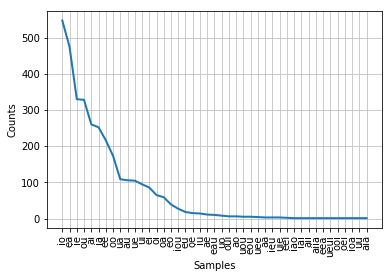

In [64]:
# useful applications of RE
word = 'supercalifragilisticexpialidocious'
re.findall(r'[aeiou]', word)

wsj = sorted(set(nltk.corpus.treebank.words()))
fd = nltk.FreqDist(vs for word in wsj
                      for vs in re.findall(r'[aeiou]{2,}', word))
fd.most_common(12)
fd.plot()

In [68]:
rotokas_words = nltk.corpus.toolbox.words('rotokas.dic')
cvs = [cv for w in rotokas_words for cv in re.findall(r'[ptksvr][aeiou]', w)]
cfd = nltk.ConditionalFreqDist(cvs)
cfd.tabulate()

    a   e   i   o   u 
k 418 148  94 420 173 
p  83  31 105  34  51 
r 187  63  84  89  79 
s   0   0 100   2   1 
t  47   8   0 148  37 
v  93  27 105  48  49 


[u'ka',
 u'ka',
 u'ka',
 u'ka',
 u'ka',
 u'ro',
 u'ka',
 u'ka',
 u'vi',
 u'ko',
 u'ka',
 u'ka',
 u'vo',
 u'ka',
 u'ka',
 u'ko',
 u'ka',
 u'ka',
 u'si',
 u'ka',
 u'ka',
 u'ka',
 u'ka',
 u'ko',
 u'ka',
 u'ki',
 u'to',
 u'ka',
 u'ku',
 u'pa',
 u'to',
 u'ka',
 u'va',
 u'ka',
 u'pa',
 u'ka',
 u'pe',
 u'ka',
 u'pi',
 u'ka',
 u'pi',
 u'ka',
 u'pi',
 u'pa',
 u'to',
 u'ka',
 u'pi',
 u'si',
 u'ka',
 u'pi',
 u'si',
 u'vi',
 u'ra',
 u'ka',
 u'po',
 u'ka',
 u'po',
 u'pa',
 u'to',
 u'ka',
 u'ra',
 u'ka',
 u're',
 u'ka',
 u're',
 u'ko',
 u'ka',
 u're',
 u'ko',
 u'pi',
 u'ka',
 u're',
 u'to',
 u're',
 u'va',
 u'ka',
 u'va',
 u'ka',
 u'va',
 u'ka',
 u've',
 u'ka',
 u'ka',
 u've',
 u'ka',
 u'pi',
 u'ka',
 u've',
 u'ka',
 u'pi',
 u'vi',
 u'ra',
 u'ka',
 u've',
 u'ka',
 u'vi',
 u'ra',
 u'ka',
 u'ka',
 u'ka',
 u'ka',
 u'ka',
 u'ka',
 u'ka',
 u'ka',
 u'ro',
 u'ka',
 u'ka',
 u'ka',
 u'ka',
 u'so',
 u'to',
 u'ka',
 u'ka',
 u'vi',
 u'ra',
 u'ka',
 u'ke',
 u'ru',
 u'ka',
 u'pa',
 u'ka',
 u'pi',
 u'ka',
 u'pi',


In [73]:
cv_word_pairs = [(cv,w) for w in rotokas_words
                for cv in re.findall(r'[ptksvr][aeiou]', w)]
cv_index = nltk.Index(cv_word_pairs)
cv_index['su']
cv_index['po']

[u'kaapo',
 u'kaapopato',
 u'kaipori',
 u'kaiporipie',
 u'kaiporivira',
 u'kapo',
 u'kapoa',
 u'kapokao',
 u'kapokapo',
 u'kapokapo',
 u'kapokapoa',
 u'kapokapoa',
 u'kapokapora',
 u'kapokapora',
 u'kapokaporo',
 u'kapokaporo',
 u'kapokari',
 u'kapokarito',
 u'kapokoa',
 u'kapoo',
 u'kapooto',
 u'kapoovira',
 u'kapopaa',
 u'kaporo',
 u'kaporo',
 u'kaporopa',
 u'kaporoto',
 u'kapoto',
 u'karokaropo',
 u'karopo',
 u'kepo',
 u'kepoi',
 u'keposi',
 u'kepoto']

In [77]:
#serching tokenized Text
from nltk.corpus import gutenberg, nps_chat
moby = nltk.Text(gutenberg.words('melville-moby_dick.txt'))
moby.findall(r'<a>(<.*>)<man>')
chat = nltk.Text(nps_chat.words())
chat.findall(r"<.*><.*><bro>")
chat.findall(r'<l.*>{3,}')

monied; nervous; dangerous; white; white; white; pious; queer; good;
mature; white; Cape; great; wise; wise; butterless; white; fiendish;
pale; furious; better; certain; complete; dismasted; younger; brave;
brave; brave; brave
you rule bro; telling you bro; u twizted bro
lol lol lol; lmao lol lol; lol lol lol; la la la la la; la la la; la
la la; lovely lol lol love; lol lol lol.; la la la; la la la


In [78]:
from nltk.corpus import brown
hobbies_learned = nltk.Text(brown.words(categories=['hobbies','learned']))
hobbies_learned.findall(r'<\w*><and><other><\w*s>')

speed and other activities; water and other liquids; tomb and other
landmarks; Statues and other monuments; pearls and other jewels;
charts and other items; roads and other features; figures and other
objects; military and other areas; demands and other factors;
abstracts and other compilations; iron and other metals


### 3.6 Normmalizing Text

In [84]:

raw = """DENNIS: Listen, strange women lying in ponds distributing swords
... is no basis for a system of government.  Supreme executive power derives from
... a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)

# stemmers
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
# porter stemmer correctly handles the word, while lancaster stemmer does not.
[porter.stem(t) for t in tokens]
[lancaster.stem(t) for t in tokens]

['den',
 ':',
 'list',
 ',',
 'strange',
 'wom',
 'lying',
 'in',
 'pond',
 'distribut',
 'sword',
 '...',
 'is',
 'no',
 'bas',
 'for',
 'a',
 'system',
 'of',
 'govern',
 '.',
 'suprem',
 'execut',
 'pow',
 'der',
 'from',
 '...',
 'a',
 'mand',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'som',
 'farc',
 'aqu',
 'ceremony',
 '.']

In [86]:
porter = nltk.PorterStemmer()
grail = nltk.corpus.webtext.words('grail.txt')
text = IndexedText(porter, grail)
text.concordance('lie')

NameError: name 'IndexedText' is not defined